In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
from matplotlib import cm, ticker
plt.rcParams.update({'font.size': 16})
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.family': 'serif'})

import networkx as nx

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from seaborn import clustermap, hls_palette

from utils import distance
from utils import CommonFunctions as CF

from galib import models as HM

from scipy.linalg import eig

import seaborn as sns

In [2]:
def compute_corrmat(ress):
    ### Compute cophenetic correlation coefficient
    T = len(ress)

    corr_mat = np.zeros((T-1,T-1))

    for idx in range(T):
        z1 = ress[idx][2]
        dist1 = cophenet(z1)
    
        for idy in range(idx+1,T):
            z2 = ress[idy][2]
            dist2 = cophenet(z2)
        
            #print(idx,idy)
            corr_mat[idx,idy-1] = np.corrcoef(dist1, dist2)[0,1]

    corr_mat[np.tril_indices(T-1,-1)] = np.nan
    #corr_mat += corr_mat.T

    return (corr_mat)

# Generate network

In [3]:
N = 128

#HMshape = [2,2,32]
#avklist = [1,4,20]

HMshape = [2,2,32]
avklist = [1,3,20]

adj = HM.HMRandomGraph(HMshape, avklist)

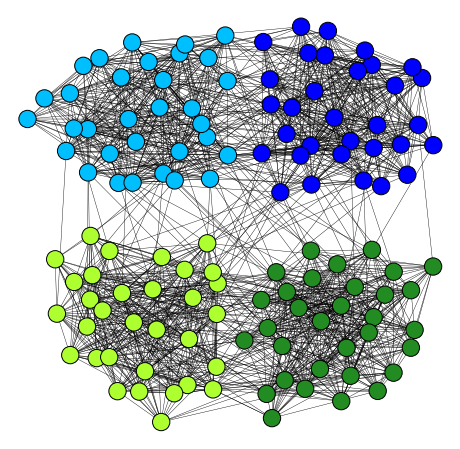

In [4]:
G = nx.from_numpy_array(adj)
pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G)

plt.figure(figsize=(8,8))
ax1 = plt.subplot(1,1,1)
nx.draw(G, ax=ax1, pos=pos, width=0.4, linewidths=1, edgecolors="black", node_color=np.repeat(['blue', 'deepskyblue', 'greenyellow', 'forestgreen'], N//4))
plt.savefig('figures/figure3_HM.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [79]:
HMshape = [2,2,32]
avklist = [1,4,20]

adj = HM.HMRandomGraph(HMshape, avklist)

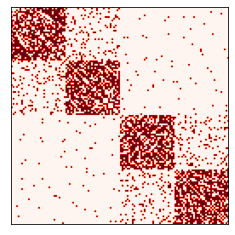

In [82]:
plt.imshow(adj, cmap='Reds')
plt.xticks([])
plt.yticks([])
plt.show()

# Compute distances

In [5]:
dynamics = ['NoisyVM', 'Population', 'Epidemics', 'Epidemics', 'Biochemical', 'Mutualistic', 'Neuronal', 'Synchronization', 'Regulatory', 'Regulatory']
params = [[1, 1], [1, 1, 2, 1], [1,1], [1, 0.05], [1, 1, 1], [1, 1, 1], [1, 1, 1], [0, 1], [1, 1, 1, 1], [1, 1, 2, 1]]
params_to_print = ['', ' b=2', ' R=1', ' R=0.05', '']
labels_short = ['NVM', 'Pop$_{b=2}$', r'Epi$_{R=1}$', r'Epi$_{R=0.05}$', 'Bio', 'Mut', 'Neu', 'Syn', r'Reg$_{a=1}$', r'Reg$_{a=2}$']

JACOBIAN DISTANCE
Dynamics: NoisyVM
[1, 1]


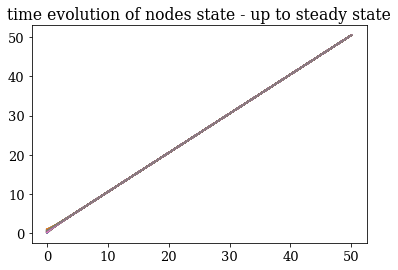

[1, 1]
Normalizing jacobian - $\lambda_{max}=$1.2839874015683252
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


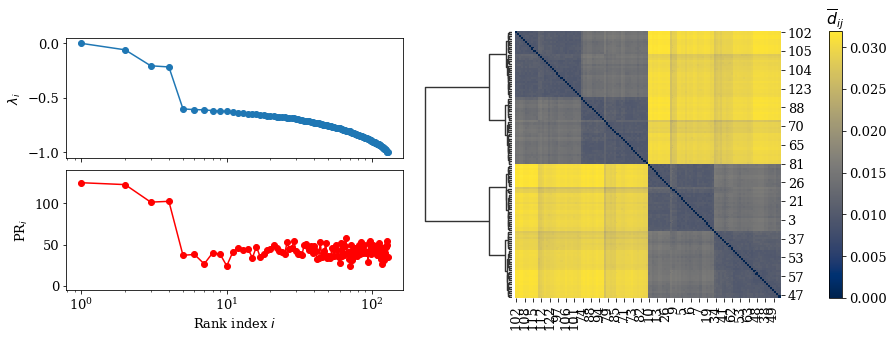

JACOBIAN DISTANCE
Dynamics: Population
[1, 1, 2, 1]


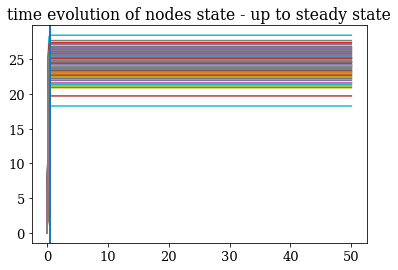

[1, 1, 2, 1]
Normalizing jacobian - $\lambda_{max}=$59.49653676497524
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


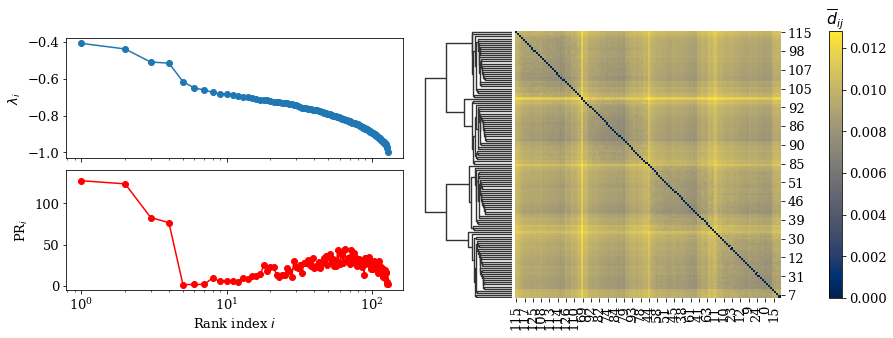

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


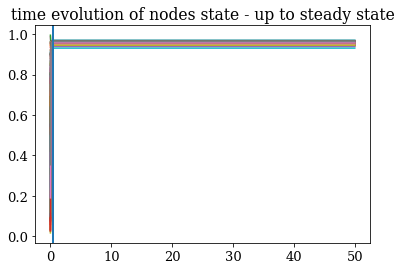

[1, 1]
Normalizing jacobian - $\lambda_{max}=$32.644062065512706
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


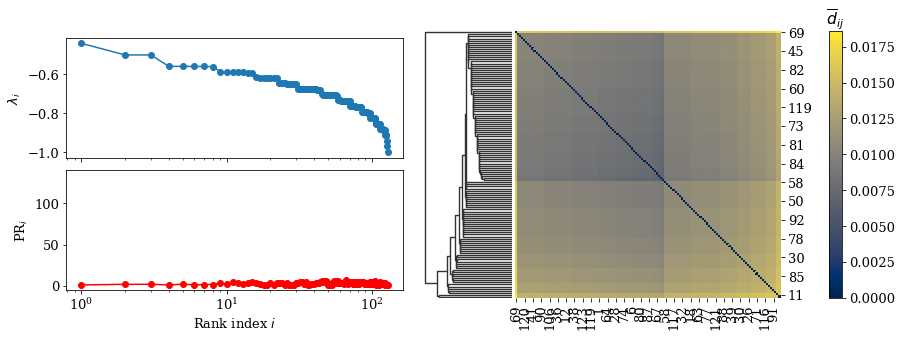

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.05]


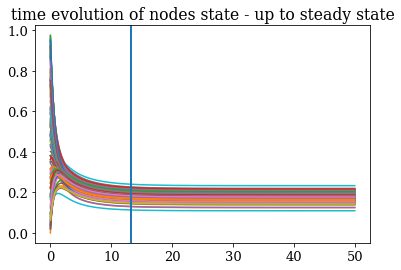

[1, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.5050630667542508
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


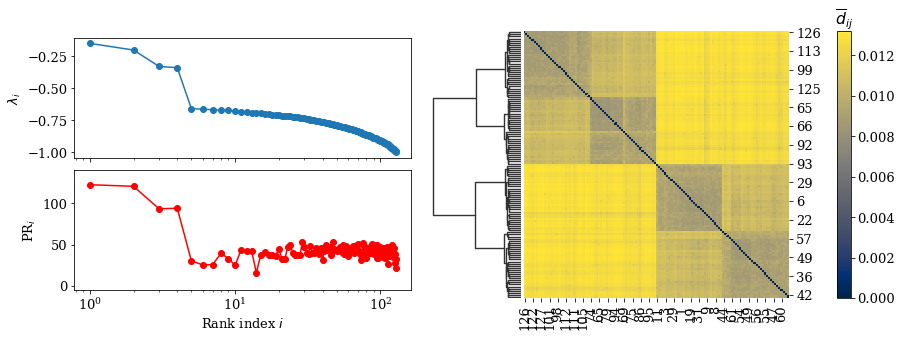

JACOBIAN DISTANCE
Dynamics: Biochemical
[1, 1, 1]


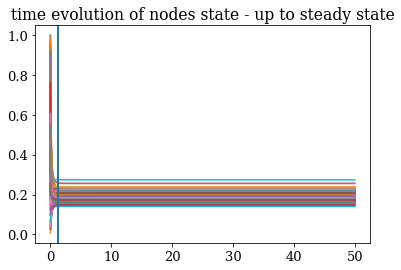

[1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$10.067502410490487
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


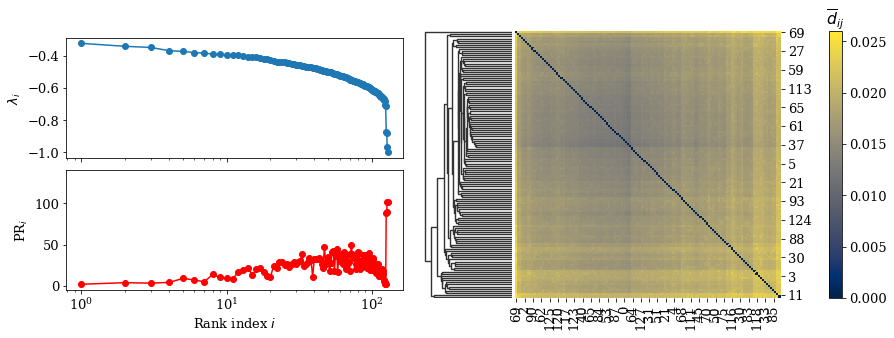

JACOBIAN DISTANCE
Dynamics: Mutualistic
[1, 1, 1]


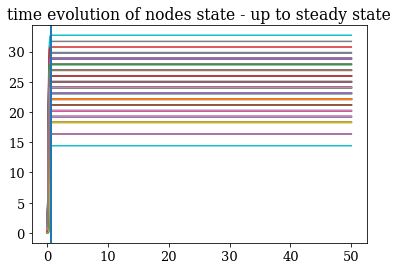

[1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$32.700218655212545
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


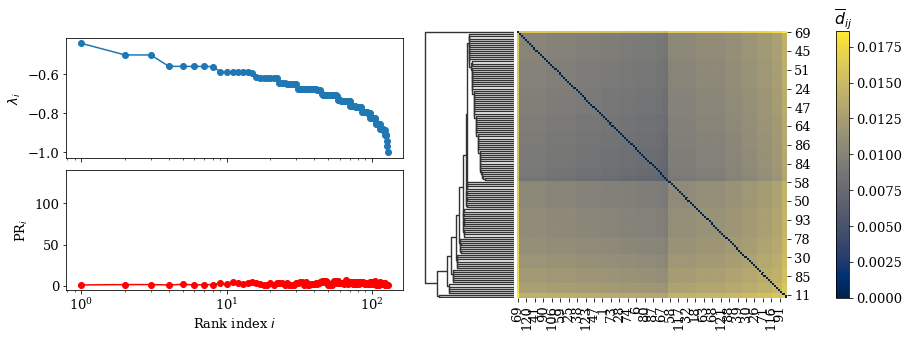

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 1, 1]


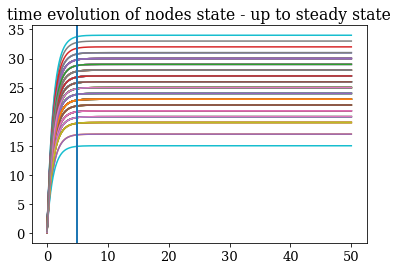

[1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.000000000000001
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


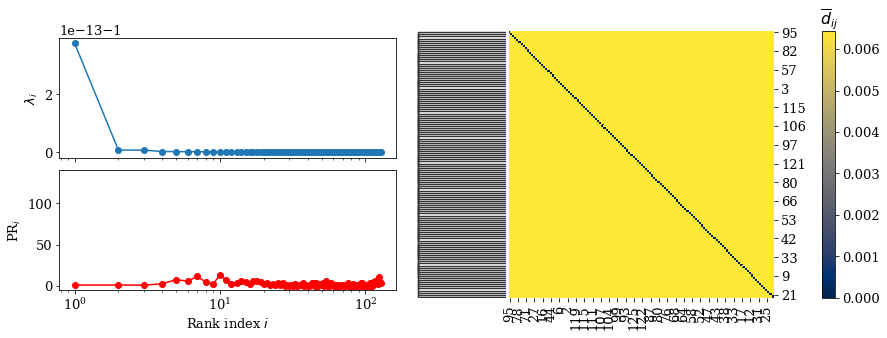

JACOBIAN DISTANCE
Dynamics: Synchronization
[0, 1]


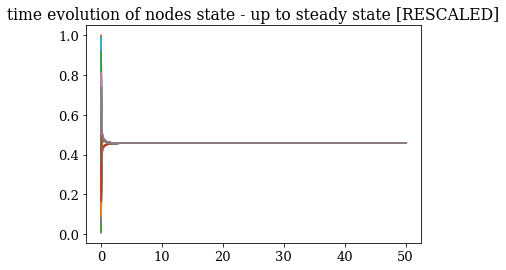

[0, 1]
Normalizing jacobian - $\lambda_{max}=$35.447095807865495
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


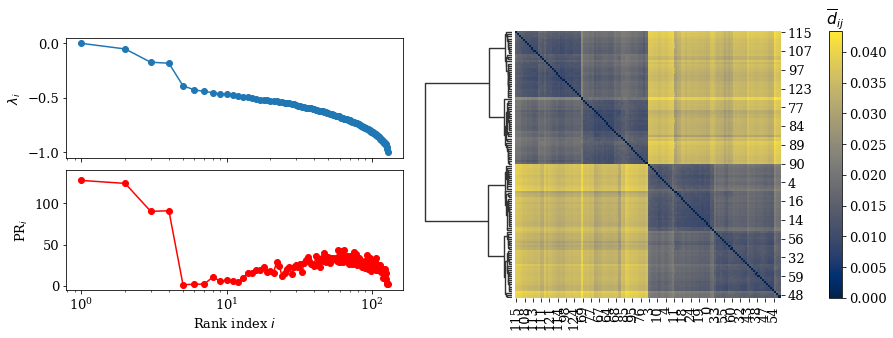

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 1, 1, 1]


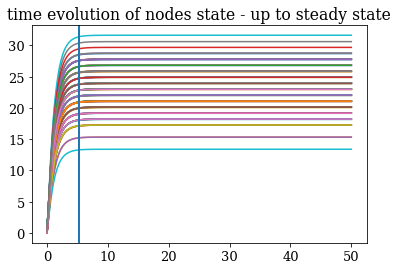

[1, 1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.0133595065562533
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


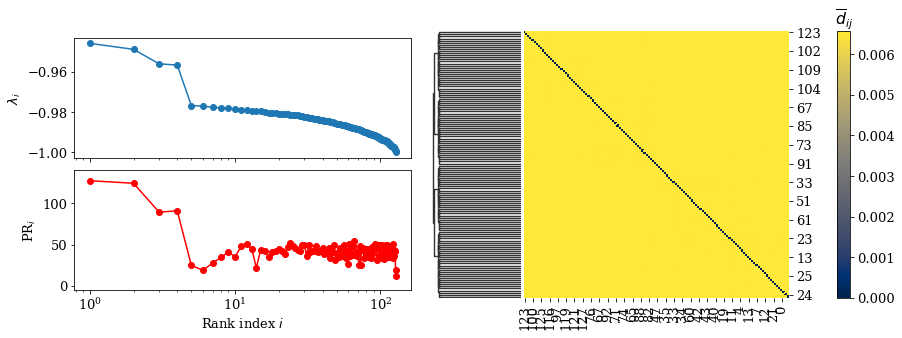

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 1, 2, 1]


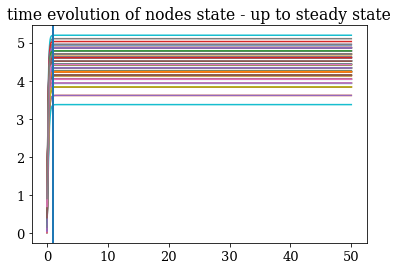

[1, 1, 2, 1]
Normalizing jacobian - $\lambda_{max}=$10.401820684808692
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


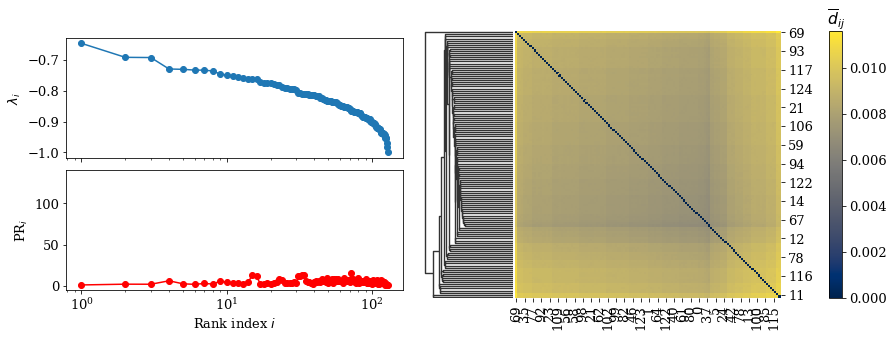

In [6]:
ress = []

for i, dynamic in enumerate(dynamics):
    res = distance.jacobian_distance(adj, dynamic, norm=True, args=params[i], name='fig3', title=None, comms=None)
    ress.append(res)

DIFFUSION DISTANCE
- Compute laplacian...
1.0 1.0
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


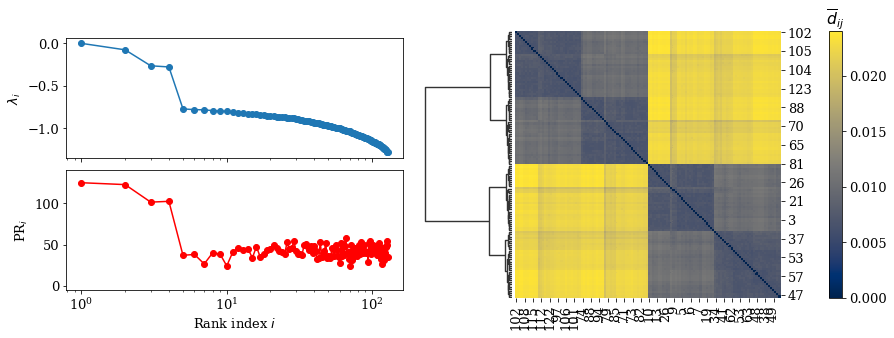

In [7]:
diff = distance.diffusion_distance(adj, name='fig3', title=None, comms=None)

# Figure

In [8]:
from scipy.cluster.hierarchy import cophenet

In [9]:
### Compute cophenetic correlation coefficient
T = len(ress)

corr_mat = np.zeros((T-1,T-1))

for idx in range(T):
    z1 = ress[idx][2]
    dist1 = cophenet(z1)
    
    for idy in range(idx+1,T):
        z2 = ress[idy][2]
        dist2 = cophenet(z2)
        
        #print(idx,idy)
        corr_mat[idx,idy-1] = np.corrcoef(dist1, dist2)[0,1]

corr_mat[np.tril_indices(T-1,-1)] = np.nan
#corr_mat += corr_mat.T

print(corr_mat)

[[ 9.27572862e-01 -3.49574318e-03  9.80419560e-01 -1.91906063e-03
  -3.52863934e-03  3.21167337e-02  9.99931624e-01  8.49342090e-01
  -2.19984801e-03]
 [            nan  3.92828480e-02  9.81465845e-01  3.93758194e-02
   3.92443267e-02  4.89345506e-02  9.29068514e-01  9.78366626e-01
   4.13766513e-02]
 [            nan             nan  2.42406127e-03  9.37864523e-01
   9.99998094e-01  2.36332776e-01  1.19358561e-04 -1.27765919e-03
   9.98426826e-01]
 [            nan             nan             nan  4.98113102e-03
   2.38670365e-03  3.98855356e-02  9.80943262e-01  9.35065189e-01
   4.21472254e-03]
 [            nan             nan             nan             nan
   9.37821102e-01  2.39795717e-01  1.37711688e-03  1.56383408e-03
   9.40587406e-01]
 [            nan             nan             nan             nan
              nan  2.36387319e-01  8.68229118e-05 -1.31380677e-03
   9.98400731e-01]
 [            nan             nan             nan             nan
              nan           

In [10]:
def plot_results(avg_dd, cmap='Spectral_r', method='ward', name=None, comms=None, row_colors=None, title=None, figsize=(18,8)):
    N = len(avg_dd)
    
    ### Plot clustermap
    # Create linkage
    mylinkage = linkage(squareform(avg_dd), method=method)
    
    # Setup row colors
    if row_colors is None and comms is not None:
        #labels = np.repeat(np.arange(n_comms),N//n_comms)
        #row_colors = [palette[i] for i in labels]
        n_comms = len(np.unique(comms))
        palette = hls_palette(n_comms)
        row_colors = [palette[i] for i in comms]
    
    # Create clustermap
    clust_map = clustermap(avg_dd, row_linkage=mylinkage, col_linkage=mylinkage,
                           cmap=cmap,
                           #cbar_kws = dict(orientation='horizontal'),
                           cbar_pos=None,
                           row_colors=row_colors,
                           tree_kws=dict(linewidths=1.4),
                           figsize=figsize,dendrogram_ratio=0.15, #0.15
                           xticklabels=False, yticklabels=False)

    clust_map.ax_col_dendrogram.set_visible(False) # hide dendrogram above columns
    
    # Update position
    clust_map.gs.update(left=0.5) #0.5
    
    # Setup colorbar
    cbnorm = Normalize(vmin=np.min(avg_dd),vmax=np.max(avg_dd)) #setting the scale
    cb = plt.colorbar(cm.ScalarMappable(norm=cbnorm, cmap=cmap),ax=clust_map.ax_heatmap,pad=0.01) #0.08
    #cb.ax.set_title(r'$\overline{d}_{ij}$')
    cb.ax.tick_params(labelsize=20)
    tick_locator = ticker.MaxNLocator(nbins=4)
    cb.locator = tick_locator
    cb.update_ticks()
    
    plt.tight_layout()
    if title is not None:
        plt.title(title, size=40)
    
    if name is not None:
        plt.savefig(name, bbox_inches='tight', pad_inches=0.1)
    
    plt.show()

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


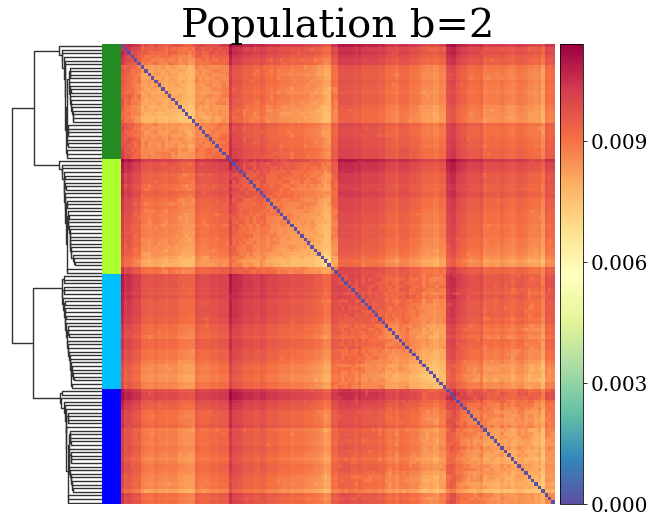

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


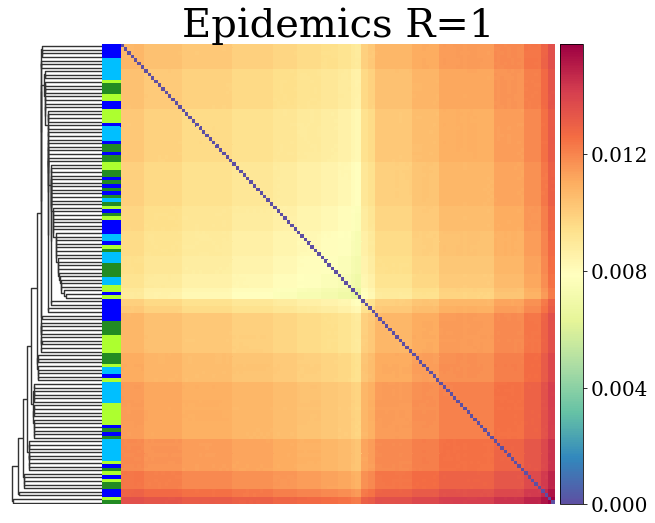

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


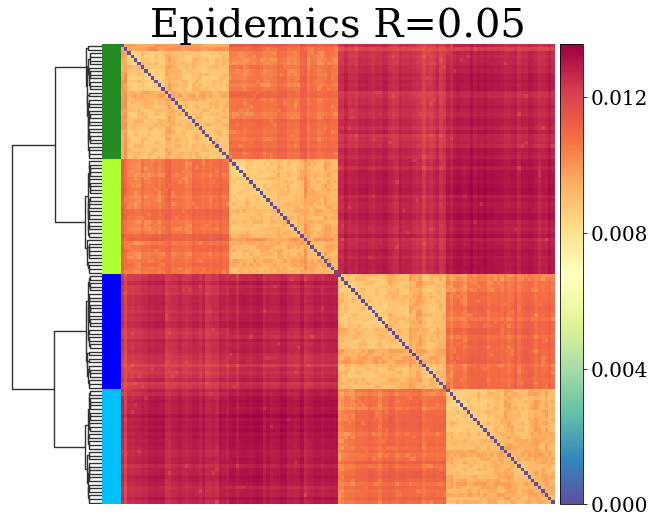

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


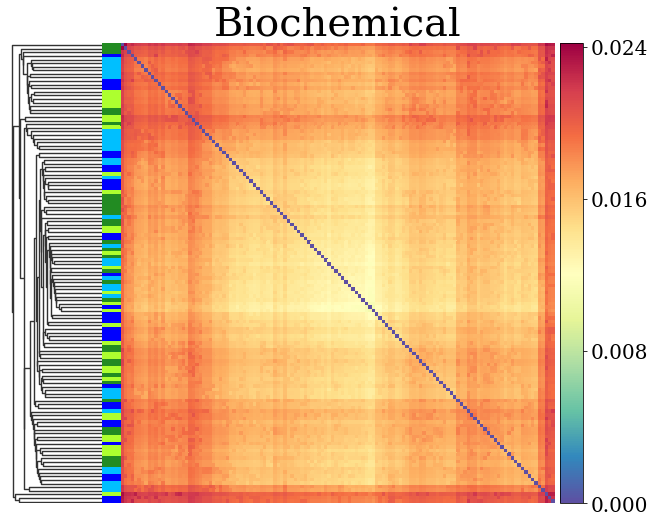

In [167]:
#titles = ['Regulatory', 'Population', 'Biochemical', 'Epidemics, B=1', 'Epidemics, B=0.05']

to_print = [1, 2, 3, 4]

j = 0
for i, res in enumerate(ress):
    if i not in to_print:
        continue
    name = f'figures/figure3_{i+1}.pdf'
    #name = None
    #row_colors=np.repeat(['blue', 'paleturquoise', 'greenyellow', 'forestgreen'], N//4)
    row_colors=np.repeat(['blue', 'deepskyblue', 'greenyellow', 'forestgreen'], N//4)
    plot_results(res[0], name=name, title=dynamics[i]+params_to_print[i], row_colors=row_colors)

In [ ]:
#labels = ['Diff', 'Pop a=1 b=2', 'Pop a=1 b=2', 'Epi B=1', 'Epi B=0.05']
ms = 15

ki = np.sum(adj, axis=0)
kj = ki[:,None]
kk = 1/ki + 1/kj
#kk = 1/(ki*kj)

idx = np.triu_indices(N,1)

fig = plt.figure(figsize=(10,8))
# set height ratios for subplots

for i in range(4):
    plt.plot(kk[idx], ress[i][0][idx]/np.max(ress[i][0][idx]), 'o', label=labels_short[i], ms=ms, alpha=0.5)
plt.ylabel(r'$\overline{\delta_{ij}}/max(\overline{\delta_{ij}})$', size=40)
plt.legend(fontsize=26)

plt.savefig('figures/figure3_scatter.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

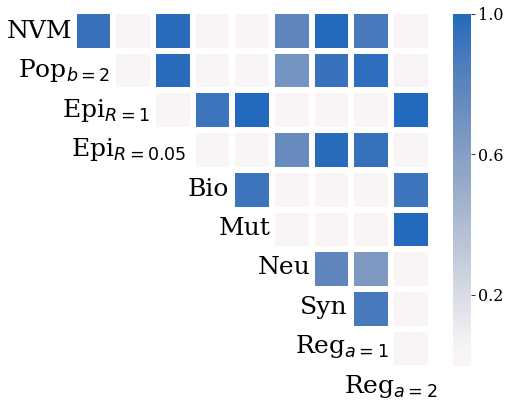

In [168]:
size = 25

# Set up the matplotlib figure
f, corr = plt.subplots(figsize=(8,8))

# Generate a custom diverging colormap
cmap = sns.color_palette("mako_r", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr_mat, cmap="vlag_r", vmax=1, vmin=np.nanmin(corr_mat), center=0, square=True, linewidths=5,
                       cbar_kws={"shrink": .81, "ticks":[0.2, 0.6,1]})

plt.xticks([])
plt.yticks([])

offs = np.zeros(len(labels_short))
offs[0] -= 0.15
offs[1] -= 0.55
offs[2] -= 0.5
offs[3] -= 0.9
offs[4] += 0.1
offs[-2] -= 0.55
offs[-1] -= 0.3
for i in range(len(labels_short)):
    corr.text(-0.7+i+offs[i],0.5+i*.995, labels_short[i], ha='center', va='center', size=size)

#fig = sns_plot.get_figure()
#fig.savefig('figures/figure2_corr.pdf', bbox_inches='tight', pad_inches=0.1)
plt.savefig('figures/figure3_corr.pdf', bbox_inches='tight', pad_inches=0.1)

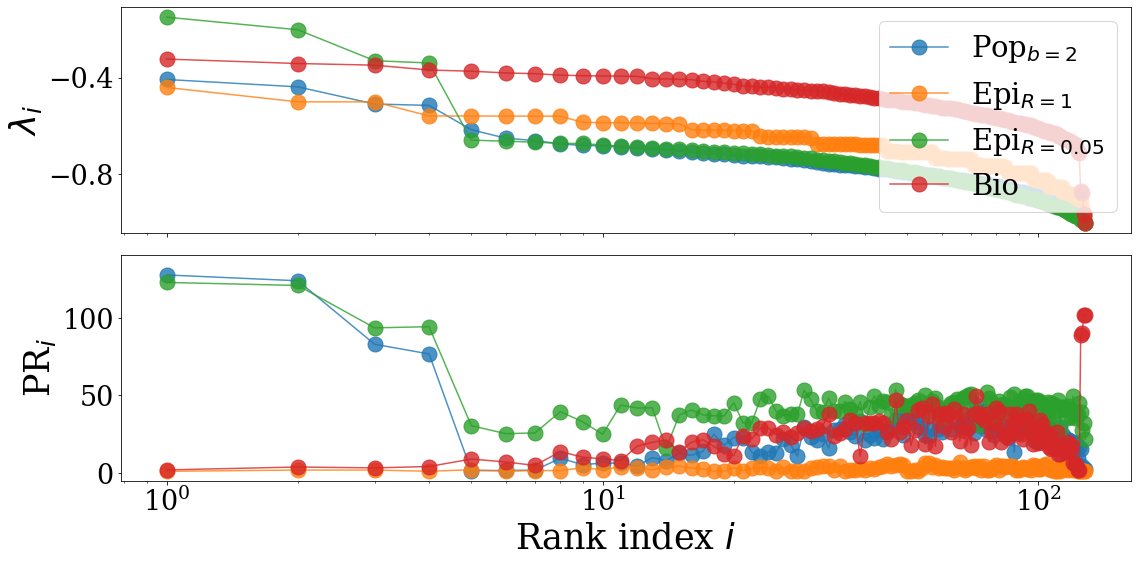

In [11]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(16,8))
ms = 15
alpha = 0.8
size = 35

to_print = [1, 2, 3, 4]

for i, res in enumerate(ress):
    if i not in to_print:
        continue
    
    # Get eigevalues and eigenvectors
    eigvals, eigl, eigr = eig(res[-1], left=True, right=True)
    # Get order
    eigvals = eigvals.real
    order = np.argsort(-eigvals)
    # Get partecipation ratio
    pr = ( np.sum(eigl**2 *eigr**2, axis=0) / np.sum(eigl * eigr, axis=0)**2 )**-1
    
    # Plot eigenvalues
    ax1.plot(np.arange(len(res[-1]))+1, eigvals[order], 'o-', ms=ms, alpha=alpha, label=labels_short[i])
    # Plot partecipation ratio
    ax2.plot(np.arange(len(res[-1]))+1, pr[order], 'o-', ms=ms, alpha=alpha)

ax1.set_ylabel(r'$\lambda_i$', size=size)
ax1.set_xscale('log')
ax1.axes.xaxis.set_ticklabels([])
ax1.legend(fontsize=size-6, loc='upper right')

ax1.tick_params(labelsize=size-8)
ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
#ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

ax2.set_ylim(-5,N*11/10)
ax2.set_xscale('log')
#plt.yscale('log')
ax2.set_xlabel(r'Rank index $i$', size=size)
ax2.set_ylabel(r'PR$_i$', size=size)
ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax2.tick_params(labelsize=size-8)

#plt.subplots_adjust(hspace=0.2)
plt.tight_layout()
plt.savefig('figures/figure3_eigvals.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

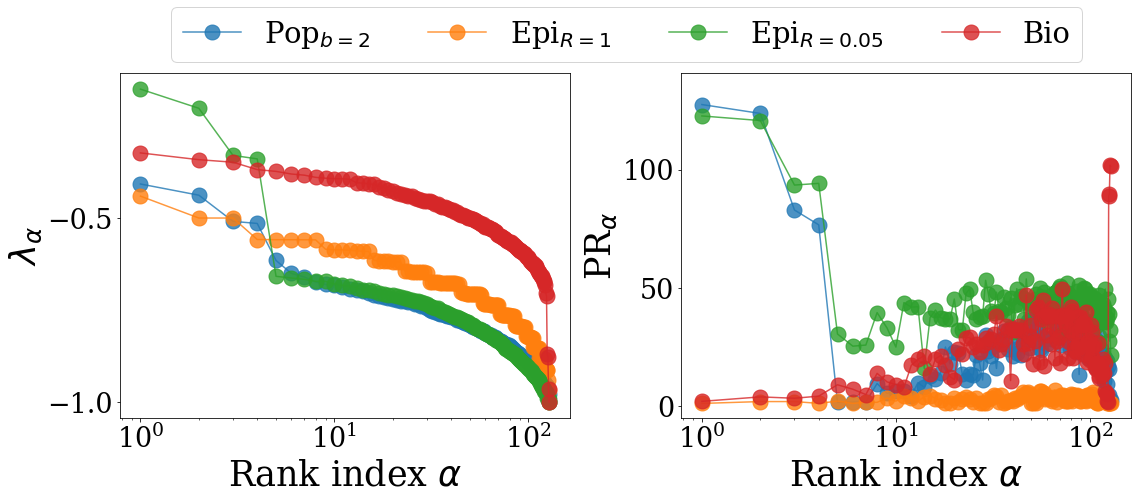

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6.2))
ms = 15
alpha = 0.8
size = 35

to_print = [1, 2, 3, 4]

for i, res in enumerate(ress):
    if i not in to_print:
        continue
    
    # Get eigevalues and eigenvectors
    eigvals, eigl, eigr = eig(res[-1], left=True, right=True)
    # Get order
    eigvals = eigvals.real
    order = np.argsort(-eigvals)
    # Get partecipation ratio
    pr = ( np.sum(eigl**2 *eigr**2, axis=0) / np.sum(eigl * eigr, axis=0)**2 )**-1
    
    # Plot eigenvalues
    ax1.plot(np.arange(len(res[-1]))+1, eigvals[order], 'o-', ms=ms, alpha=alpha, label=labels_short[i])
    # Plot partecipation ratio
    ax2.plot(np.arange(len(res[-1]))+1, pr[order], 'o-', ms=ms, alpha=alpha)

ax1.set_ylabel(r'$\lambda_\alpha$', size=size)
ax1.set_xlabel(r'Rank index $\alpha$', size=size)
ax1.set_xscale('log')
#ax1.axes.xaxis.set_ticklabels([])
#plt.legend(fontsize=size-6, loc='upper right', ncol = 4, bbox_to_anchor = (0, -0.1, 1, 1), bbox_transform = plt.gcf().transFigure)

ax1.tick_params(labelsize=size-8)
#plt.ylim(None,0.1)
#ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax1.set_yticks([-1,-0.5])
#ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

ax2.set_ylim(-5,N*11/10)
ax2.set_xscale('log')
#plt.yscale('log')
ax2.set_xlabel(r'Rank index $\alpha$', size=size)
ax2.set_ylabel(r'PR$_\alpha$', size=size)
ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax2.tick_params(labelsize=size-8)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=size-6, bbox_to_anchor = (0, -0.1, 1.1, 1.25))

#plt.subplots_adjust(hspace=0.2)
plt.tight_layout()
plt.savefig('figures/figure3_eigvals.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Epidemics

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


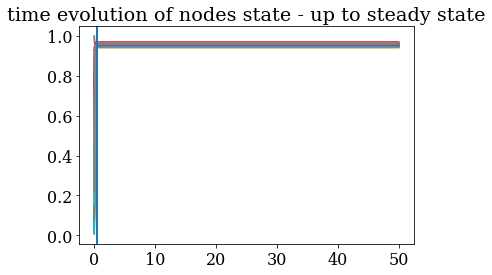

[1, 1]
Normalizing jacobian - $\lambda_{max}=$33.57373251077027
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


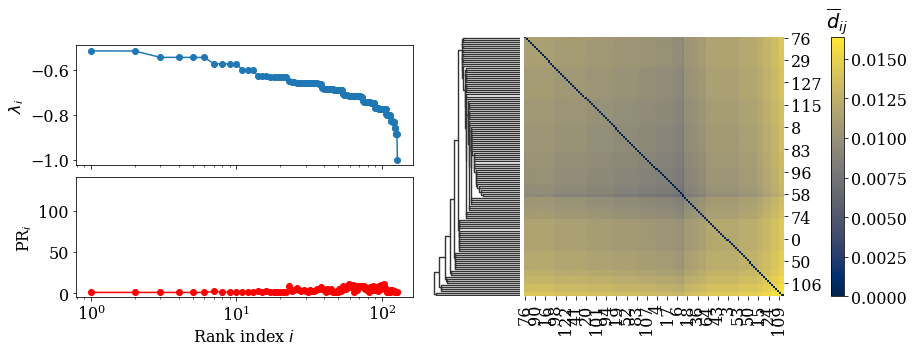

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.5]


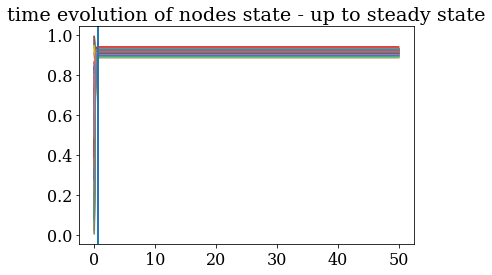

[1, 0.5]
Normalizing jacobian - $\lambda_{max}=$16.579697735274234
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


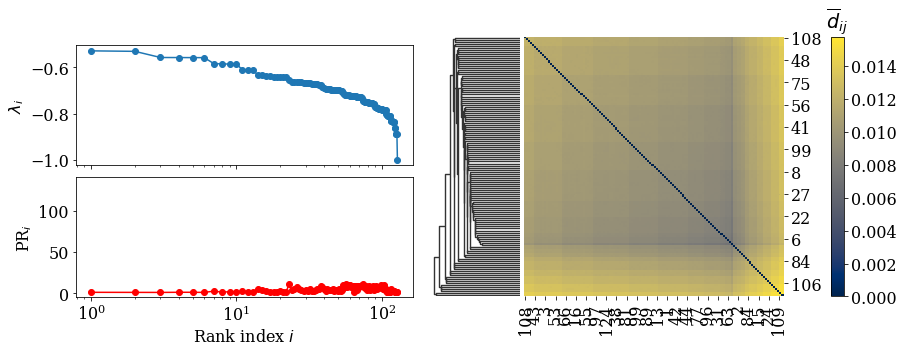

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.1]


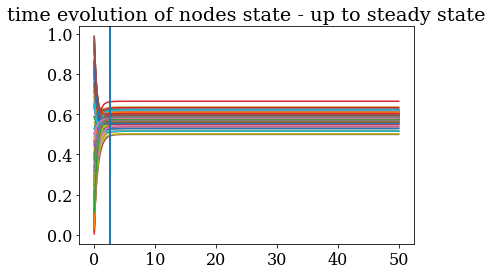

[1, 0.1]
Normalizing jacobian - $\lambda_{max}=$3.035420777562422
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


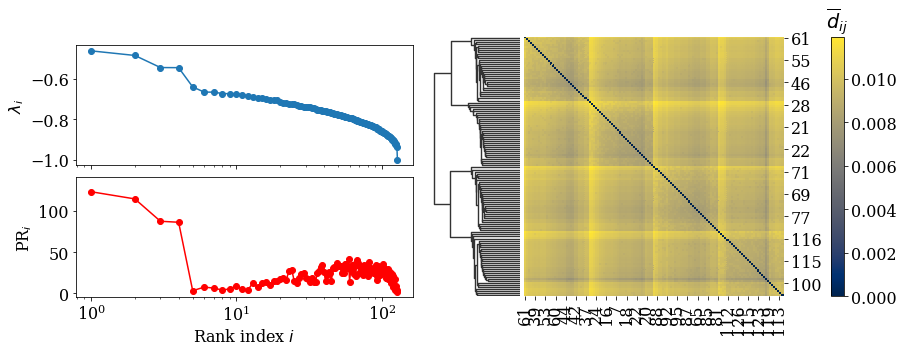

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.05]


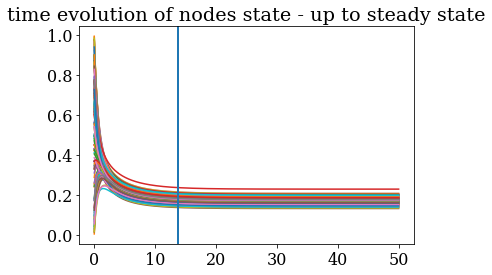

[1, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.4983096781724532
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


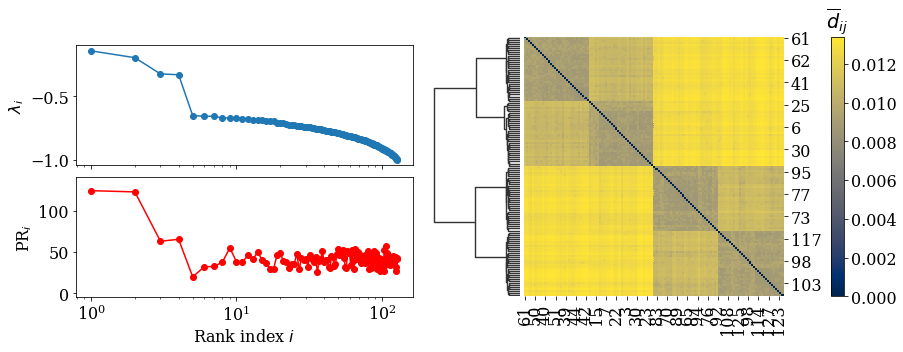

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.01]


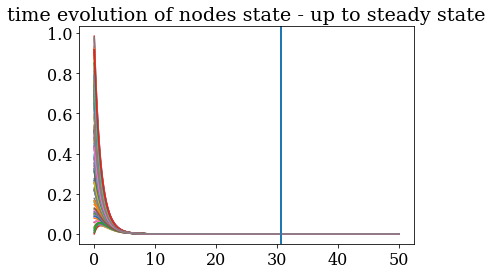

[1, 0.01]
Normalizing jacobian - $\lambda_{max}=$1.0681560465979287
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


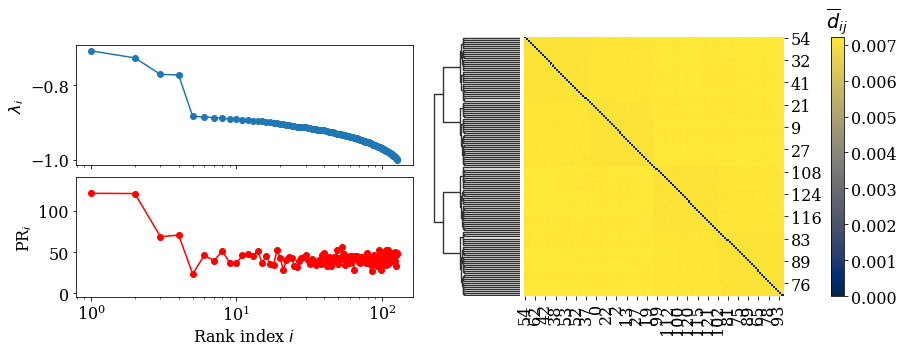

In [143]:
B = [1, 0.5, 0.1, 0.05, 0.01]
params = [[1, b] for b in B]

ress_epi = []

for param in params:
    res = distance.jacobian_distance(adj, 'Epidemics', norm=True, args=param, name='fig3_epi', title=None, comms=None)
    ress_epi.append(res)

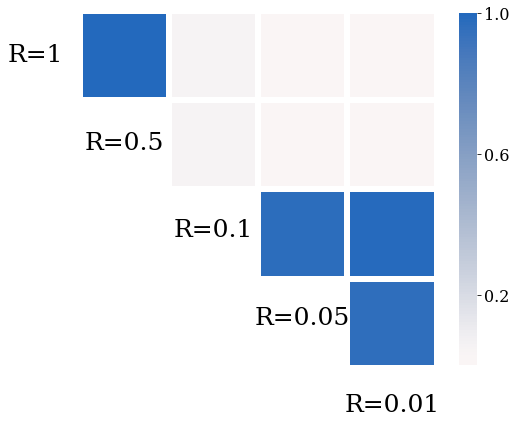

In [171]:
corr_mat = compute_corrmat(ress_epi)

labels_short = [f'R={b}' for b in B]

size = 25

# Set up the matplotlib figure
f, corr = plt.subplots(figsize=(8,8))

# Generate a custom diverging colormap
cmap = sns.color_palette("mako_r", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr_mat, cmap="vlag_r", vmax=1, vmin=0, center=0, square=True, linewidths=5, cbar_kws={"shrink": .81, "ticks":[0.2, 0.6,1]})

plt.xticks([])
plt.yticks([])

offs = np.zeros(len(labels_short))
offs[2] -= 0.4
offs[3] -= 0.7
offs[-2] -= 0.55
offs[-1] -= 0.5

for i in range(len(labels_short)):
    corr.text(-0.5+i,0.5+i*.98, labels_short[i], ha='center', va='center', size=size)

plt.savefig('figures/figure_epi_mod_corr.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

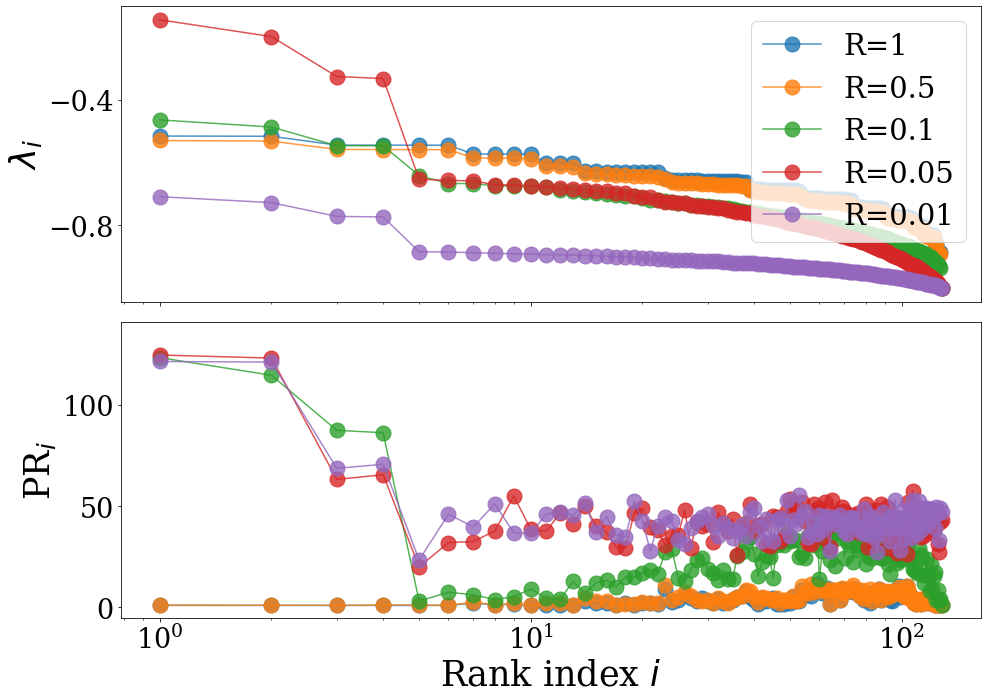

In [172]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(14,10))
ms = 15
alpha = 0.8
size = 35

for i, res in enumerate(ress_epi):
    # Get eigevalues and eigenvectors
    eigvals, eigl, eigr = eig(res[-1], left=True, right=True)
    # Get order
    eigvals = eigvals.real
    order = np.argsort(-eigvals)
    # Get partecipation ratio
    pr = ( np.sum(eigl**2 *eigr**2, axis=0) / np.sum(eigl * eigr, axis=0)**2 )**-1
    
    # Plot eigenvalues
    ax1.plot(np.arange(len(res[-1]))+1, eigvals[order], 'o-', ms=ms, alpha=alpha, label=labels_short[i])
    # Plot partecipation ratio
    ax2.plot(np.arange(len(res[-1]))+1, pr[order], 'o-', ms=ms, alpha=alpha)

ax1.set_ylabel(r'$\lambda_i$', size=size)
ax1.set_xscale('log')
ax1.axes.xaxis.set_ticklabels([])
ax1.legend(fontsize=size-6, loc='upper right')

ax1.tick_params(labelsize=size-8)
ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
#ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

ax2.set_ylim(-5,N*11/10)
ax2.set_xscale('log')
#plt.yscale('log')
ax2.set_xlabel(r'Rank index $i$', size=size)
ax2.set_ylabel(r'PR$_i$', size=size)
ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax2.tick_params(labelsize=size-8)

#plt.subplots_adjust(hspace=0.2)
plt.tight_layout()
plt.savefig('figures/figure3_epi_eigvals.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

# LFR

True
n_comms: 4


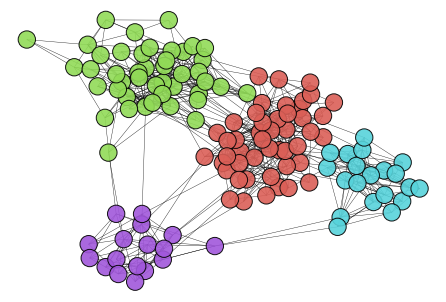

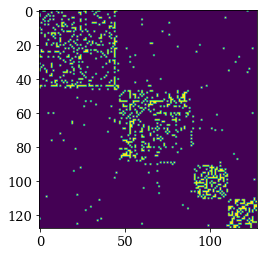

In [13]:
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.08
G = nx.LFR_benchmark_graph(N, tau1, tau2, mu, min_degree=4, min_community=15, max_community=120, seed=10)
G.remove_edges_from(nx.selfloop_edges(G))
print(nx.is_connected(G))
lfr = nx.to_numpy_array(G)

### Get communities
comms = []

for i in range(N):
    tmp = G.nodes[i]['community']
    
    if tmp not in comms:
        comms.append(tmp)
        
print('n_comms:', len(comms))

### Reorder nodes
lfr = nx.to_numpy_array(G)
sizes = [len(list(i)) for i in comms]
comms = [list(i) for i in comms]
comms = np.concatenate(comms)
lfr = lfr[:,comms][comms]
comms = np.concatenate([[val]*size for val, size in enumerate(sizes)])

G = nx.from_numpy_array(lfr)
palette = hls_palette(len(np.unique(comms)))
row_colors = [palette[i] for i in comms]
nx.draw(G, width=0.4, linewidths=1, edgecolors="black", node_color=row_colors, alpha=0.9)
plt.savefig('figures/figure3_lfr.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

plt.imshow(lfr)
plt.show()

JACOBIAN DISTANCE
Dynamics: NoisyVM
[1, 1]


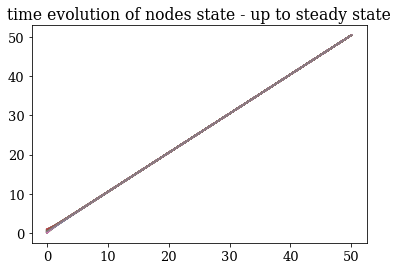

[1, 1]
Normalizing jacobian - $\lambda_{max}=$1.5798585616544154
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


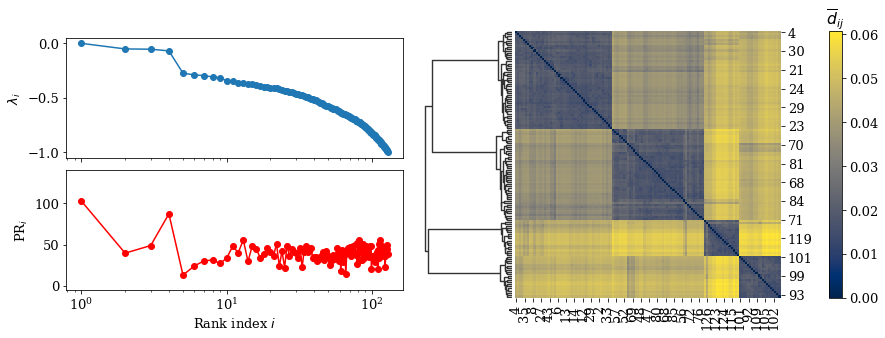

JACOBIAN DISTANCE
Dynamics: Population
[1, 1, 2, 1]


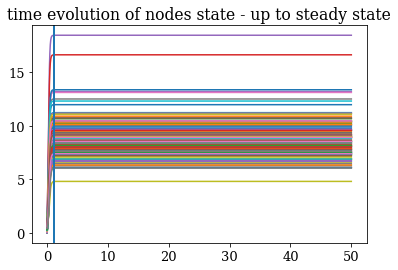

[1, 1, 2, 1]
Normalizing jacobian - $\lambda_{max}=$38.415875092809955
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


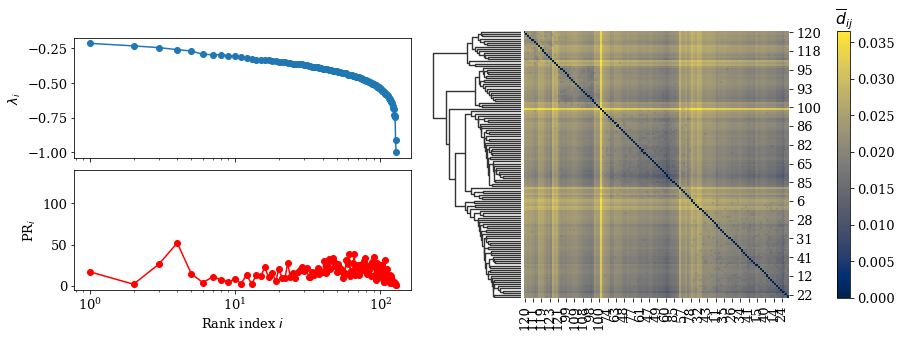

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 1]


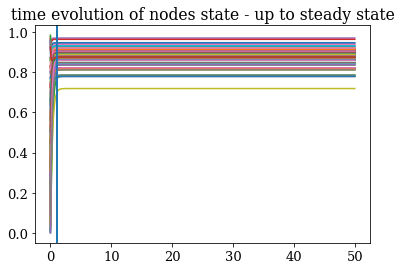

[1, 1]
Normalizing jacobian - $\lambda_{max}=$31.874285599642803
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


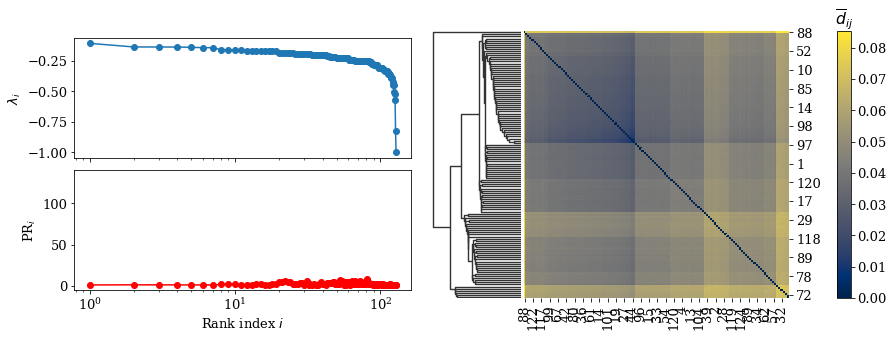

JACOBIAN DISTANCE
Dynamics: Epidemics
[1, 0.05]


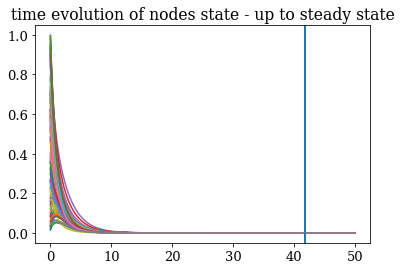

[1, 0.05]
Normalizing jacobian - $\lambda_{max}=$1.2870102992819308
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


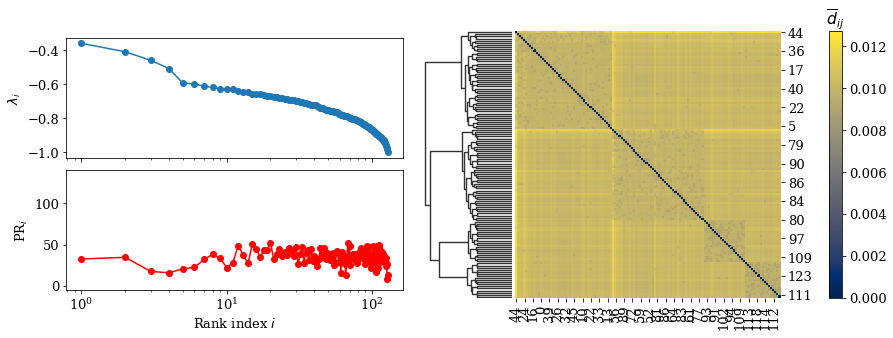

JACOBIAN DISTANCE
Dynamics: Biochemical
[1, 1, 1]


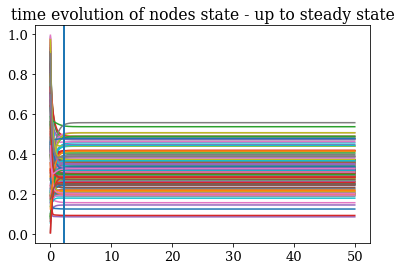

[1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$11.714815456834547
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


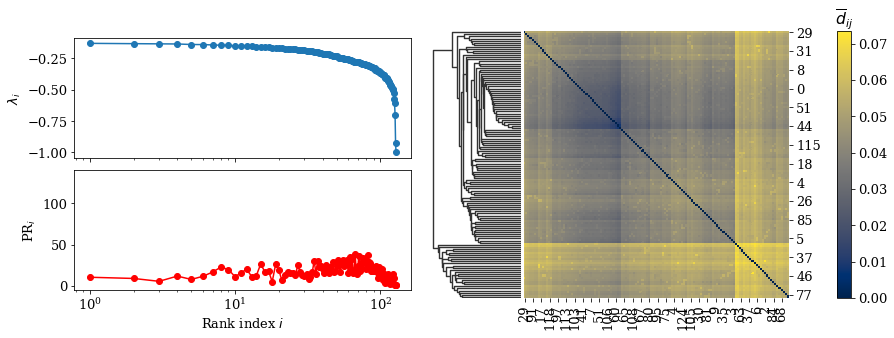

JACOBIAN DISTANCE
Dynamics: Mutualistic
[1, 1, 1]


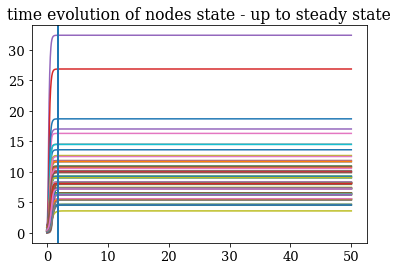

[1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$32.37898934621833
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


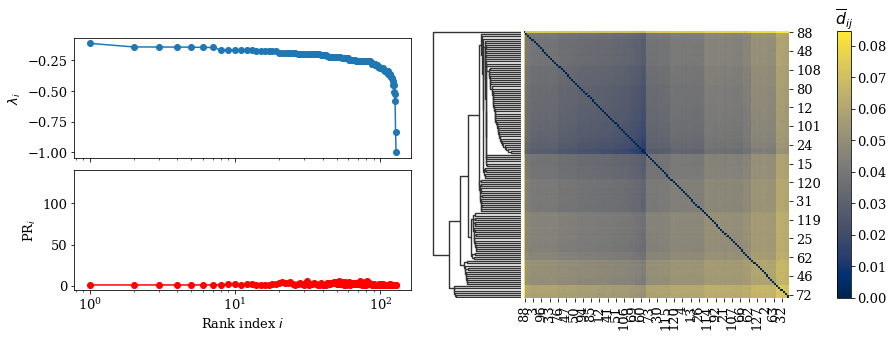

JACOBIAN DISTANCE
Dynamics: Neuronal
[1, 1, 1]


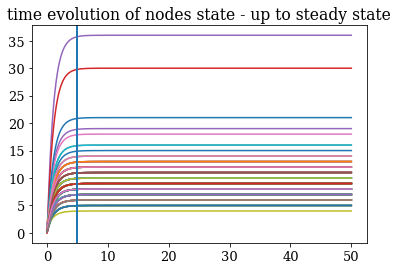

[1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.0000147285337535
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


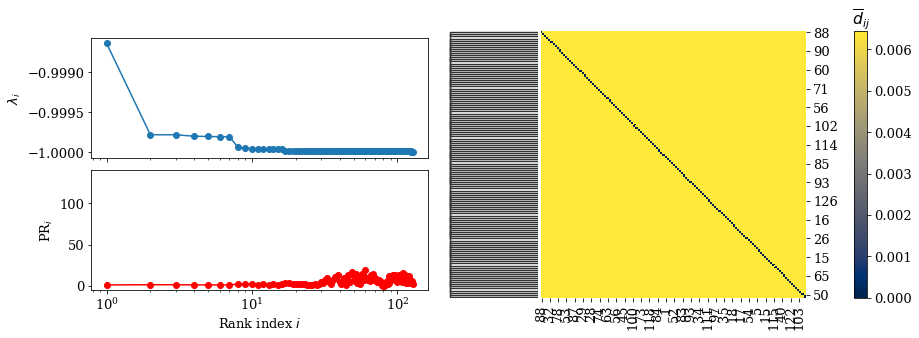

JACOBIAN DISTANCE
Dynamics: Synchronization
[0, 1]


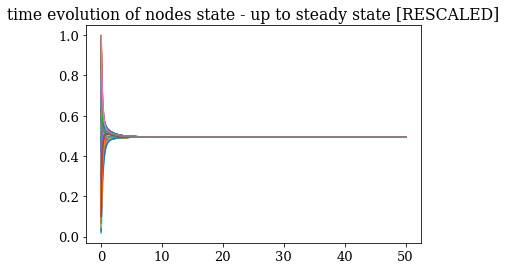

[0, 1]
Normalizing jacobian - $\lambda_{max}=$36.13151387837229
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


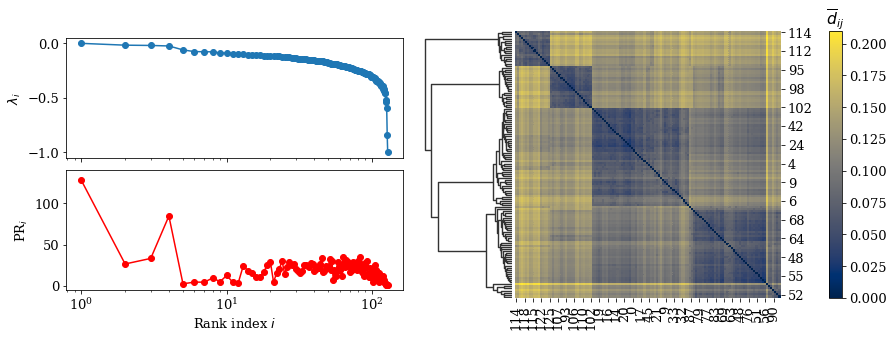

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 1, 1, 1]


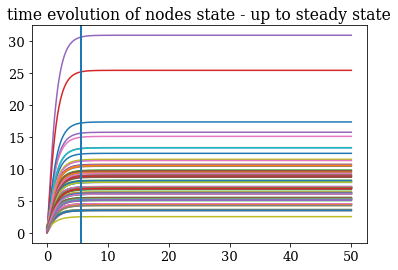

[1, 1, 1, 1]
Normalizing jacobian - $\lambda_{max}=$1.084037772804127
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


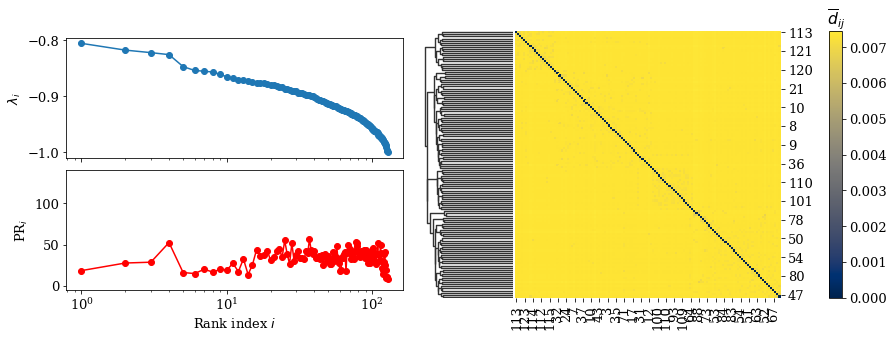

JACOBIAN DISTANCE
Dynamics: Regulatory
[1, 1, 2, 1]


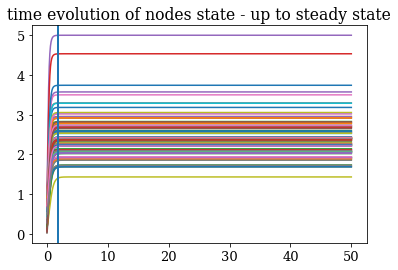

[1, 1, 2, 1]
Normalizing jacobian - $\lambda_{max}=$10.018125652976655
- Compute average distance...


  0%|          | 0/128 [00:00<?, ?it/s]

- Compute hierarchical clustering with method ward...


/home/barzon/Network_geometry/utils/distance.py:264: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


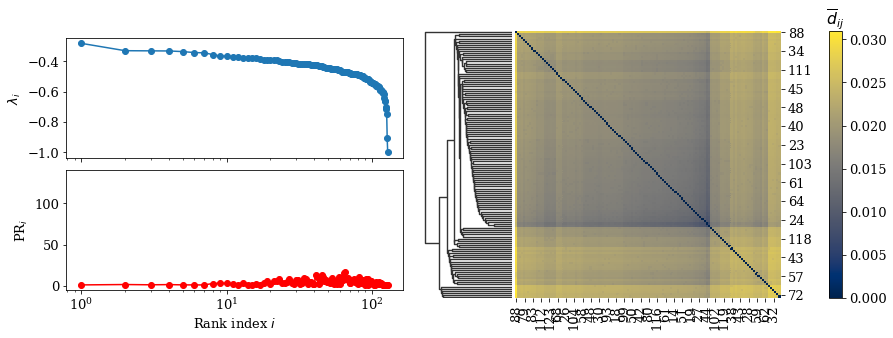

In [14]:
ress_lfr = []

for i, dynamic in enumerate(dynamics):
    res = distance.jacobian_distance(lfr, dynamic, norm=True, args=params[i], name='fig3_lfr', title=None, comms=None)
    ress_lfr.append(res)

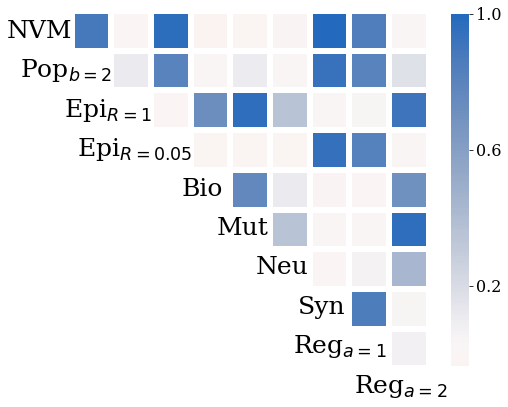

In [176]:
corr_mat = compute_corrmat(ress_lfr)

size = 25

# Set up the matplotlib figure
f, corr = plt.subplots(figsize=(8,8))

# Generate a custom diverging colormap
cmap = sns.color_palette("mako_r", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr_mat, cmap="vlag_r", vmax=1, vmin=np.nanmin(corr_mat), center=0, square=True, linewidths=5,
                       cbar_kws={"shrink": .81, "ticks":[0.2, 0.6,1]})

plt.xticks([])
plt.yticks([])

offs = np.zeros(len(labels_short))
offs[0] -= 0.1
offs[1] -= 0.45
offs[2] -= 0.4
offs[3] -= 0.7
offs[-2] -= 0.55
#offs[-1] -= 0.5
for i in range(len(labels_short)):
    corr.text(-0.7+i+offs[i],0.5+i*.995, labels_short[i], ha='center', va='center', size=size)

#fig = sns_plot.get_figure()
#fig.savefig('figures/figure2_corr.pdf', bbox_inches='tight', pad_inches=0.1)
plt.savefig('figures/figure3_lfr_corr.pdf', bbox_inches='tight', pad_inches=0.1)

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


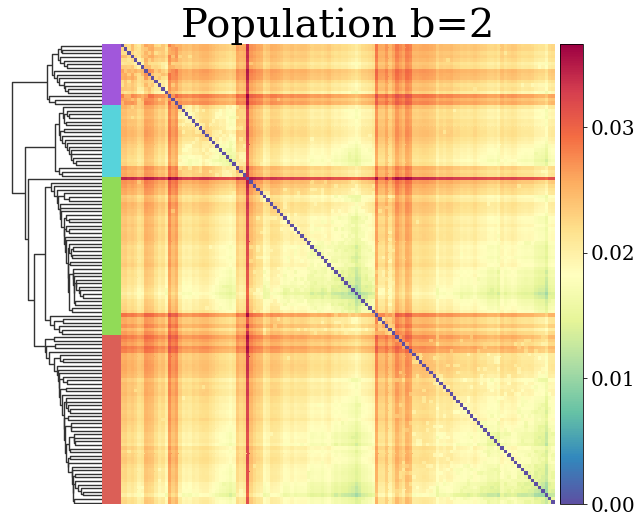

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


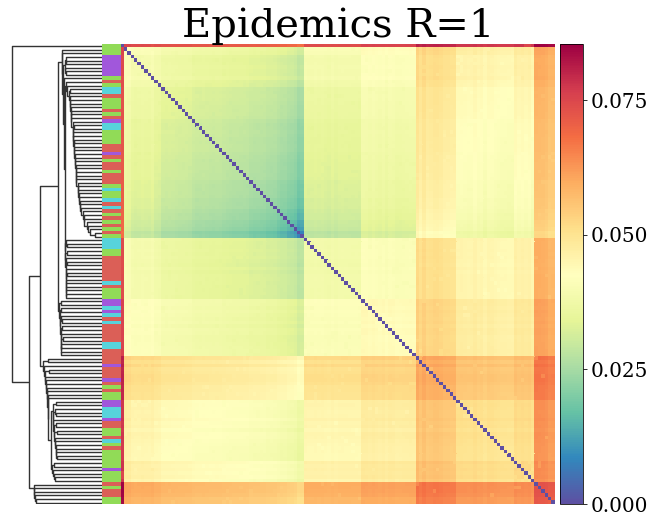

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


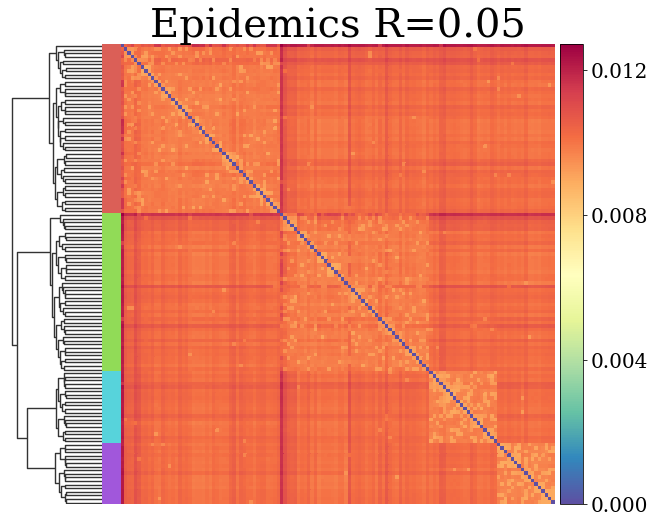

/home/barzon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


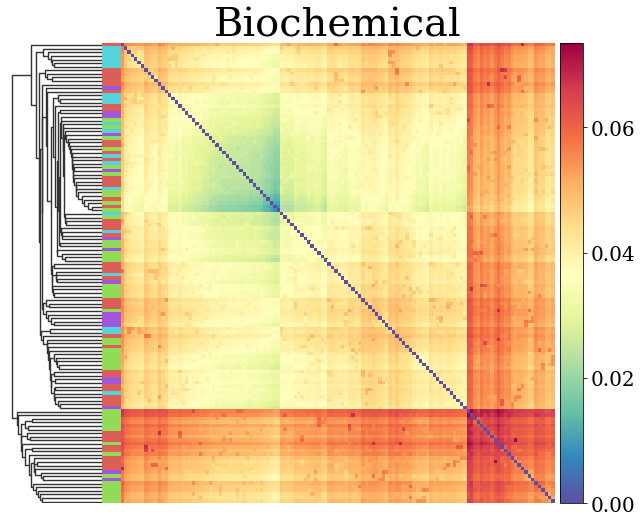

In [180]:
#titles = ['Regulatory', 'Population', 'Biochemical', 'Epidemics, B=1', 'Epidemics, B=0.05']

to_print = [1, 2, 3, 4]

j = 0
for i, res in enumerate(ress_lfr):
    if i not in to_print:
        continue
    name = f'figures/figure3_lfr_{i+1}.pdf'
    #name = None
    #row_colors=np.repeat(['blue', 'paleturquoise', 'greenyellow', 'forestgreen'], N//4)
    #row_colors=np.repeat(['blue', 'deepskyblue', 'greenyellow', 'forestgreen'], N//4)
    plot_results(res[0], name=name, title=dynamics[i]+params_to_print[i], row_colors=row_colors)

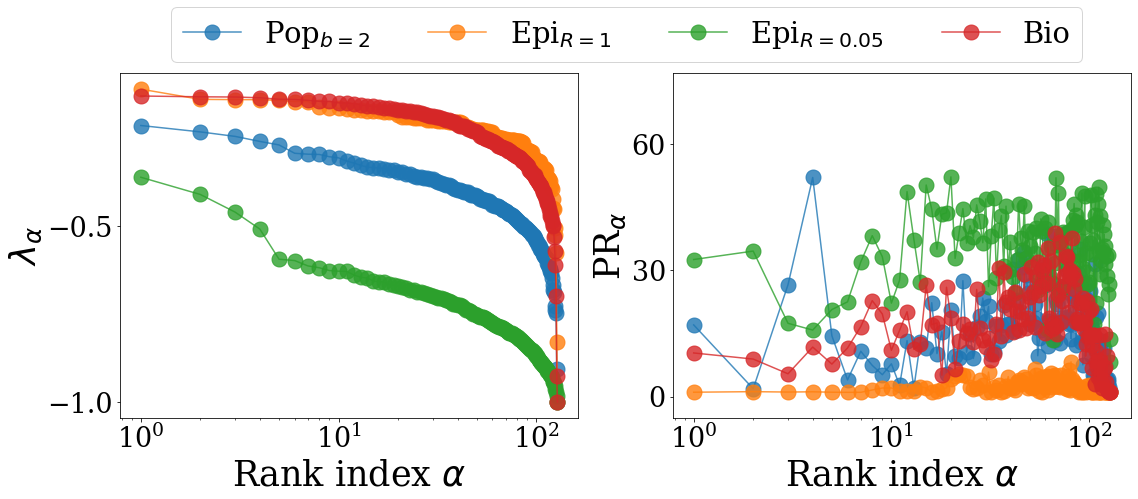

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6.2))
ms = 15
alpha = 0.8
size = 35

to_print = [1, 2, 3, 4]

for i, res in enumerate(ress_lfr):
    if i not in to_print:
        continue
    
    # Get eigevalues and eigenvectors
    eigvals, eigl, eigr = eig(res[-1], left=True, right=True)
    # Get order
    eigvals = eigvals.real
    order = np.argsort(-eigvals)
    # Get partecipation ratio
    pr = ( np.sum(eigl**2 *eigr**2, axis=0) / np.sum(eigl * eigr, axis=0)**2 )**-1
    
    # Plot eigenvalues
    ax1.plot(np.arange(len(res[-1]))+1, eigvals[order], 'o-', ms=ms, alpha=alpha, label=labels_short[i])
    # Plot partecipation ratio
    ax2.plot(np.arange(len(res[-1]))+1, pr[order], 'o-', ms=ms, alpha=alpha)

ax1.set_ylabel(r'$\lambda_\alpha$', size=size)
ax1.set_xlabel(r'Rank index $\alpha$', size=size)
ax1.set_xscale('log')
#ax1.axes.xaxis.set_ticklabels([])
#plt.legend(fontsize=size-6, loc='upper right', ncol = 4, bbox_to_anchor = (0, -0.1, 1, 1), bbox_transform = plt.gcf().transFigure)

ax1.tick_params(labelsize=size-8)
#plt.ylim(None,0.1)
#ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax1.set_yticks([-1,-0.5])
#ax1.xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

ax2.set_ylim(-5,N*6/10)
ax2.set_xscale('log')
#plt.yscale('log')
ax2.set_xlabel(r'Rank index $\alpha$', size=size)
ax2.set_ylabel(r'PR$_\alpha$', size=size)
ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
ax2.tick_params(labelsize=size-8)

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, fontsize=size-6, bbox_to_anchor = (0, -0.1, 1.1, 1.25))

#plt.subplots_adjust(hspace=0.2)
plt.tight_layout()
plt.savefig('figures/figure3_lfr_eigvals.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()